In this colab, we will implement k-means algorithm with `sklearn`.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# KMeans clustering
from sklearn.cluster import KMeans

# Loading the digit dataset
from sklearn.datasets import load_digits

# Selecting k through silhoutte score.
from sklearn.metrics import silhouette_score

# Normalization through MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline

# Clustering of digits

We will use digit dataset for clustering, which is loaded through `load_digit` API.
*  It loads `8x8` digit images with approximately 180 samples per class.  
*  From 10 classes, it has total of 1797 images.  
*  Each pixel has value between 0 and 16. 

In [ ]:
digits = load_digits()

Let's quickly check `KMeans` class as implemented in `sklearn.cluster` module.

In [ ]:
?KMeans

Some of the important parameters are as follows:
* `init`
* `n_init`
* `max_iter`
* `random_state`


Since `KMeans` algorithm is susceptible to local minima, we perform multiple `KMeans` fit and select the ones with the lowest value of sum of squared error.  

The total number of time, we would like to run KMeans algorithm is specified through `n_init` parameter.

`max_iter` specifies total number of iterations to perform before declaring the convergence.

Let's define parameters of KMeans clustering algorithm in a dictionary object:

In [ ]:
kmeans_kwargs = {
        "init": "random",
        "n_init": 50,
        "max_iter": 500,
        "random_state": 0,
    }

Let's define a `pipeline` with two stages:
* preprocessing for feature scaling with `MinMaxScaler`.
* clsutering with `KMeans` clustering algorithm.

In [ ]:
pipeline = Pipeline([("Preprocess", MinMaxScaler()), 
                     ("Clustering", KMeans(n_clusters=10, **kmeans_kwargs))])
pipeline.fit(digits.data)

Pipeline(steps=[('Preprocess', MinMaxScaler()),
                ('Clustering',
                 KMeans(init='random', max_iter=500, n_clusters=10, n_init=50,
                        random_state=0))])

The cluster centroids can be accessed via `cluster_centers_` member variable of `KMeans` class.

In [ ]:
cluster_centers = pipeline[-1].cluster_centers_

Let's display cluster centroids:

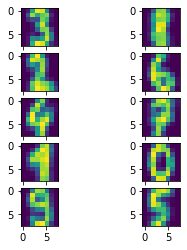

In [ ]:
# displaying centroids
fig, ax = plt.subplots(5, 2, figsize=(4, 4))
for i,j in zip(ax.flat, cluster_centers.reshape(10,8, 8)):
  i.imshow(j)

In this case, the number of clusters were known.  Hence we set `k=10` and got the clusters.

For deciding the optimal number of clusters through elbow and silhoutte, we will pretend that we do not know the number of clusters in the data and we will try to discover the optimal number of clusters through these two methods one by one:

## Elbow method

Here we keep track of sum-of-squared error (SSE) in a list for each value of `k`.

In [ ]:
#Identifying the correct number of clusters
sse_digit = []

scaled_digits = MinMaxScaler().fit_transform(digits.data)
for k in range(1,12):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_digits)
  sse_digit.append(kmeans.inertia_)

Note that the SSE for a given clustering output is obtained through `inertia_` member variable.

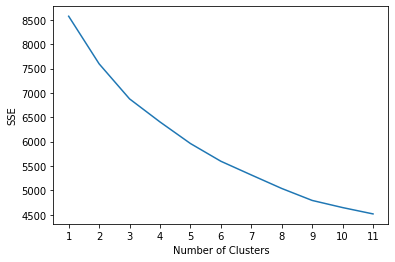

In [ ]:
plt.plot(range(1, 12), sse_digit)
plt.xticks(range(1, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

There is a slight elbow at `k=9`, which could point to the fact that a few digits may have been merged in one cluster.

## Silhoutte

In [ ]:
sil_coef_digits = []
for k in range(2, 15):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_digits)
  score = silhouette_score(digits.data, kmeans.labels_)
  sil_coef_digits.append(score)

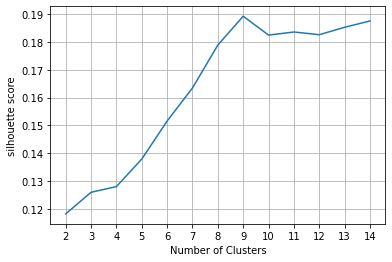

In [ ]:
plt.plot(range(2, 15), sil_coef_digits)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette score")
plt.grid(True)
plt.show()

In [ ]:
# get the value of K for which 
# sillhoutte coefficient is highest
print(np.argmax(sil_coef_digits)+2)

9


This graph points the fact that n=9 this could be because some of the digits like 1 and 7 make have striking similarity.